##ORIGINALLY PULLED BY GregorUT

from bs4 import BeautifulSoup
import urllib
import pandas as pd

pages = 18
rec_count = 0
rank = []
gname = []
platform = []
year = []
genre = []
publisher = []
sales_na = []
sales_eu = []
sales_jp = []
sales_ot = []
sales_gl = []

urlhead = 'http://www.vgchartz.com/gamedb/?page='
urltail = '&results=1000&name=&platform=&minSales=0.01&publisher=&genre=&sort=GL'

for page in range(1,pages):
	surl = urlhead + str(page) + urltail	
	r = urllib.urlopen(surl).read()
	soup = BeautifulSoup(r)
	print page
	chart = soup.find("table", class_="chart")
	for row in chart.find_all('tr')[1:]:
		try: 
			col = row.find_all('td')
		
			#extract data into column data
			column_1 = col[0].string.strip()
			column_2 = col[1].string.strip()		
			column_3 = col[2].string.strip()		
			column_4 = col[3].string.strip()		
			column_5 = col[4].string.strip()	
			column_6 = col[5].string.strip()
			column_7 = col[6].string.strip()		
			column_8 = col[7].string.strip()		
			column_9 = col[8].string.strip()		
			column_10 = col[9].string.strip()		
			column_11 = col[10].string.strip()

			#Add Data to columns
			#Adding data only if able to read all of the columns
			rank.append(column_1)
			gname.append(column_2)
			platform.append(column_3)
			year.append(column_4)
			genre.append(column_5)
			publisher.append(column_6)
			sales_na.append(column_7)
			sales_eu.append(column_8)
			sales_jp.append(column_9)
			sales_ot.append(column_10)
			sales_gl.append(column_11)
		
			rec_count += 1
	
		except:
			continue

columns = {'rank': rank, 'name': gname, 'platform': platform, 'year': year, 'genre': genre, 'publisher': publisher, 'NA_Sales':sales_na, 'EU_Sales': sales_eu,'JP_Sales': sales_jp,'Other_Sales':sales_ot, 'Global_Sales':sales_gl }
print rec_count
df = pd.DataFrame(columns)
df = df[['Rank','Name','Platform','Year','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
del df.index.name
df.to_csv("vgsales.csv",sep=",",encoding='utf-8')

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/Users/samanthafalk/class-GA/week-08/3.1-group-eda/vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df['Name'].value_counts()

Need for Speed: Most Wanted                             12
Ratatouille                                              9
FIFA 14                                                  9
LEGO Marvel Super Heroes                                 9
Madden NFL 07                                            9
LEGO Star Wars II: The Original Trilogy                  8
Cars                                                     8
FIFA 15                                                  8
Angry Birds Star Wars                                    8
Lego Batman 3: Beyond Gotham                             8
Terraria                                                 8
LEGO Harry Potter: Years 5-7                             8
Madden NFL 08                                            8
The LEGO Movie Videogame                                 8
LEGO Jurassic World                                      8
Monopoly                                                 8
FIFA Soccer 13                                          

In [6]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO',
       'GG', 'PCFX'], dtype=object)

25-75 percentile

In [7]:
df.loc[df['Platform'] == 'PC']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
137,138,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.07,6.21,0.00,0.00,6.28
181,182,Diablo III,PC,2012.0,Role-Playing,Activision,2.43,2.15,0.00,0.62,5.20
194,195,Microsoft Flight Simulator,PC,1996.0,Simulation,Microsoft Game Studios,3.22,1.69,0.00,0.20,5.12
217,218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,Activision,2.56,1.68,0.00,0.59,4.83
267,268,Warcraft II: Tides of Darkness,PC,1995.0,Strategy,Activision,1.70,2.27,0.00,0.23,4.21
281,282,Half-Life,PC,1997.0,Shooter,Vivendi Games,4.03,0.00,0.09,0.00,4.12
288,289,World of Warcraft: The Burning Crusade,PC,2007.0,Role-Playing,Activision,2.57,1.52,0.00,0.00,4.09
310,311,The Elder Scrolls V: Skyrim,PC,2011.0,Role-Playing,Bethesda Softworks,1.15,2.09,0.00,0.64,3.88
328,329,The Sims: Unleashed,PC,2002.0,Simulation,Electronic Arts,2.03,1.56,0.00,0.17,3.76


In [8]:
df.loc[df['Platform'] == 'Wii']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
39,40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
48,49,Super Mario Galaxy,Wii,2007.0,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52
60,61,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.26


In [9]:
PSdf= df.loc[df['Platform'].isin(['PS','PS2','PS3','PS4']) ]

In [10]:
PSdf['Platform'].value_counts()

PS2    2161
PS3    1329
PS     1196
PS4     336
Name: Platform, dtype: int64

In [11]:
PSdf['Year'].value_counts()

2008.0    330
2007.0    304
2002.0    300
2006.0    286
2001.0    276
2005.0    260
2003.0    259
2004.0    259
2009.0    258
1998.0    248
2000.0    241
2011.0    223
2010.0    219
2015.0    211
1999.0    200
1997.0    188
2014.0    183
1996.0    164
2012.0    148
2013.0    143
2016.0    139
1995.0     99
1994.0     17
2017.0      1
Name: Year, dtype: int64

In [12]:
PSdf

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
37,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
40,41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98


Games with established pasts tend to perform better than new games on play station consoles (possibly all consoles)

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("vgsales.csv")
df=df[pd.notnull(df["Year"])]
df=df.drop_duplicates()
df = df[(df['Year']<2016) & (df['Year']>=2005)]

In [19]:
def handheld_bin(platform):
    dictionary={'3DS': 'Yes',
                'DC': 'No',
                'DS': 'Yes',
                'GBA': 'Yes',
                'GC': 'No',
                'PC': 'No',
                'PS2': 'No',
                'PS3': 'No',
                'PS4': 'No',
                'PSP': 'Yes',
                'PSV': 'Yes',
                'Wii': 'No',
                'WiiU': 'Yes',
                'X360': 'No',
                'XB': 'No',
                'XOne': 'No'}
    return dictionary[platform]
def platform_bin(platform):
    dictionary={'3DS': 'Nintendo',
                'DC': 'Sega',
                'DS': 'Nintendo',
                'GBA': 'Nintendo',
                'GC': 'Nintendo',
                'PC': 'PC',
                'PS2': 'Sony',
                'PS3': 'Sony',
                'PS4': 'Sony',
                'PSP': 'Sony',
                'PSV': 'Sony',
                'Wii': 'Nintendo',
                'WiiU': 'Nintendo',
                'X360': 'Microsoft',
                'XB': 'Microsoft',
                'XOne': 'Microsoft'}
    return dictionary[platform]
df["Handheld"]=df["Platform"].apply(lambda x: handheld_bin(x))
df["Platform"]=df["Platform"].apply(lambda x: platform_bin(x))
df.reset_index(inplace=True,drop=True)
print "Checking to see if we had any missing values"
print df["Handheld"].value_counts().sum()
print df["Handheld"].value_counts()
print df["Platform"].value_counts().sum()
print df["Platform"].value_counts()
print "Total Number of Rows: "+str(len(df))




Checking to see if we had any missing values
10807
No     6389
Yes    4418
Name: Handheld, dtype: int64
10807
Nintendo     4317
Sony         4097
Microsoft    1631
PC            760
Sega            2
Name: Platform, dtype: int64
Total Number of Rows: 10807


In [20]:
#This cell will get us a list of all released titles, and a list of information of the platforms
# they were released on and the respective global sales by system
names=df["Name"].unique()
titles_dictionary={}
indices=df["Name"].index
#titles_dictionary will assign each name in 'names' a list of lists consisting of ["Platform","Global Sales"]
for name in names:
    titles_dictionary[name]=[]
for index in indices:
    row=df.iloc[index].copy()
    temp=titles_dictionary[row["Name"]]
    temp.append([row["Platform"],row["Global_Sales"]])
    titles_dictionary[name]=temp
    


In [22]:
df = df[(df['Platform'] != 'Sega')]

In [21]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Handheld
0,1,Wii Sports,Nintendo,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,No
1,3,Mario Kart Wii,Nintendo,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,No
2,4,Wii Sports Resort,Nintendo,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,No
3,7,New Super Mario Bros.,Nintendo,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Yes
4,8,Wii Play,Nintendo,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,No


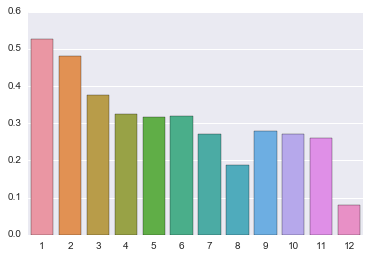

In [23]:
#Create a function that takes in a list of platforms and sales, and creates a dictionary with keys corresponding
# to the platform and global sales organized from best to worst in terms of sales; best global sales gets 1
# It will output a dictionary with values of lists  {1: [[PS3:1,100,000],[...]],2: [[PS2:750,000],[...]]}
def rank_systems(dictionary):
    return_dict={}
    for key in dictionary:
        temp=dictionary[key]
        temp.sort(key=(lambda x: x[1]))
        temp.reverse()
        for i in range(len(temp)):
            l_temp=[]
            if str(len(temp)+1) in return_dict.keys():
                l_temp=return_dict[str(i+1)]
            l_temp.append(temp[i])
            return_dict[str(i+1)]=l_temp
    return return_dict
def rank_sales(dictionary):
    return_dict={}
    for key in dictionary:
        temp=dictionary[key]
        temp.sort(key=(lambda x: x[1]))
        temp.reverse()
        for i in range(len(temp)):
            l_temp=[]
            if str(len(temp)+1) in return_dict.keys():
                l_temp=return_dict[str(i+1)]
            l_temp.append(temp[i][1])
            return_dict[str(i+1)]=l_temp
    return return_dict
systems_dictionary=rank_systems(titles_dictionary)
sales_dictionary=rank_sales(titles_dictionary)
keys=[key for key in sales_dictionary.keys()]
xs=[int(key) for key in keys]
ys=[np.mean(sales_dictionary[key]) for key in keys]
sns.barplot(x=xs, y=ys)
plt.show()


In [24]:
#Goal is to see that if you did best on console 'X', what other platforms looked like
# Use dictionary again, but filter so '1' is only console X, and '1' is non-console x
def rank_system_sales(dictionary,system):
    return_dict={}
    for key in dictionary:
        temp=dictionary[key]
        temp.sort(key=(lambda x: x[1]))
        temp.reverse()
        if temp[0][0]==system:
            for i in range(len(temp)):
                l_temp=[]
                if str(len(temp)+1) in return_dict.keys():
                    l_temp=return_dict[str(i+1)]
                l_temp.append(temp[i][1])
                return_dict[str(i+1)]=l_temp
    return return_dict
def rank_system_sales_versus(dictionary,system,competitor):
    return_dict={}
    for key in dictionary:
        temp=dictionary[key]
        if len(temp)>1:
            temp.sort(key=(lambda x: x[1]))
            temp.reverse()
            if temp[0][0]==system:
                if temp[1][0]==competitor:
                    for i in range(len(temp)):
                        l_temp=[]
                        if str(len(temp)+1) in return_dict.keys():
                            l_temp=return_dict[str(i+1)]
                        l_temp.append(temp[i][1])
                        return_dict[str(i+1)]=l_temp
    return return_dict

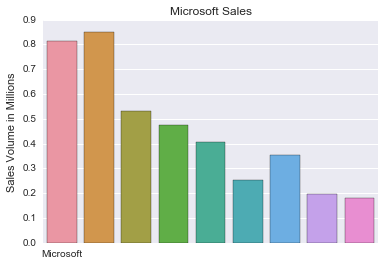

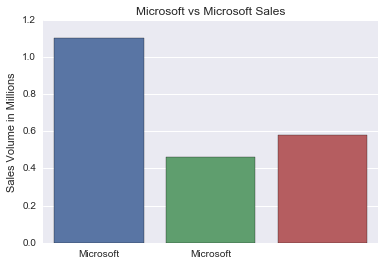

In [25]:
### Change these values to see the companies you want
primary="Microsoft"
competitor="Microsoft"
system_sales_dictionary=rank_system_sales(titles_dictionary,primary)
system_sales_versus_dictionary=rank_system_sales_versus(titles_dictionary,primary,competitor)
keys=[key for key in system_sales_dictionary.keys()]
xs=[int(key) for key in keys]
ys=[np.mean(system_sales_dictionary[key]) for key in keys]
sns.barplot(x=xs, y=ys)
plt.title("%s Sales" %primary)
plt.ylabel("Sales Volume in Millions")
plt.xticks(range(1),[primary])
plt.show()
keys=[key for key in system_sales_versus_dictionary.keys()]
xs=[int(key) for key in keys]
ys=[np.mean(system_sales_versus_dictionary[key]) for key in keys]
sns.barplot(x=xs, y=ys)
plt.title("%s"%primary+" vs "+"%s"%competitor+" Sales" )
plt.ylabel("Sales Volume in Millions")
plt.xticks(range(2),[primary,competitor])
plt.show()

In [26]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Handheld
0,1,Wii Sports,Nintendo,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,No
1,3,Mario Kart Wii,Nintendo,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,No
2,4,Wii Sports Resort,Nintendo,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,No
3,7,New Super Mario Bros.,Nintendo,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Yes
4,8,Wii Play,Nintendo,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,No


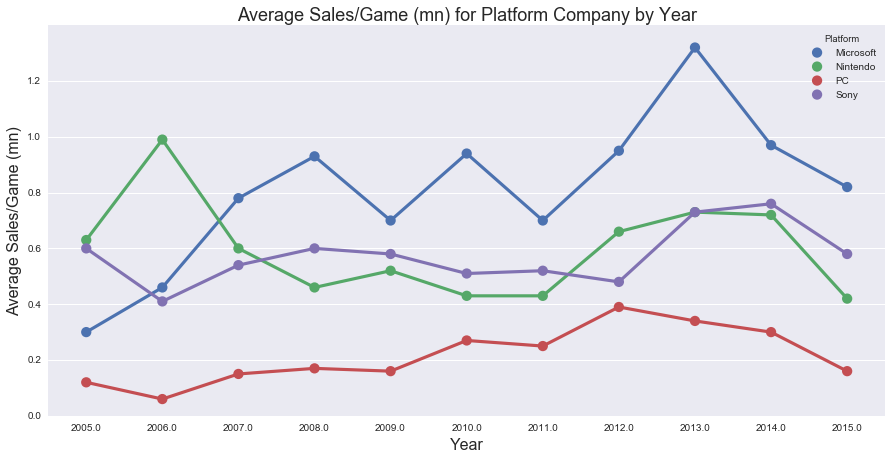

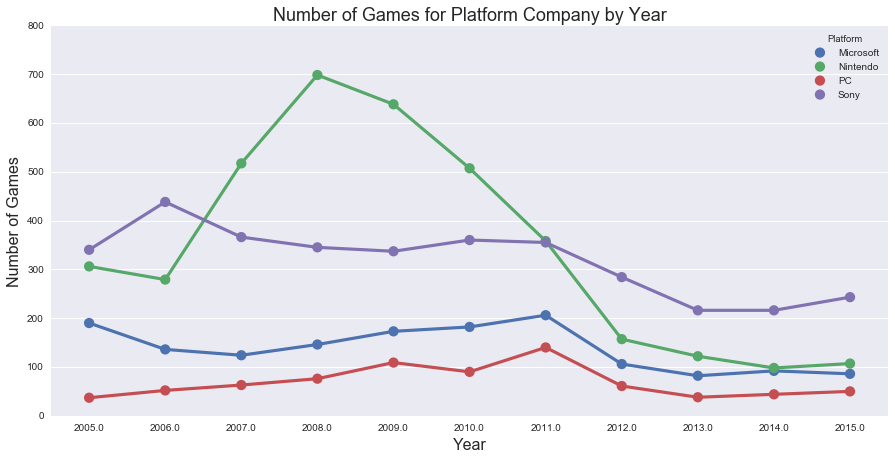

In [29]:
#group by name, year, genre and platform, summing up all sales
company_game = df.groupby(['Name','Year','Genre','Platform'])['Global_Sales'].sum().to_frame()
company_game.reset_index(inplace = True)
# group by platform_co year and genre
company_genre = company_game.groupby(['Platform','Year','Genre'])['Global_Sales'].agg({len,sum})
company_genre.reset_index(inplace = True)

#group by platform_co and year to find sales and count of all platform_co by year
company = company_game.groupby(['Platform','Year'])['Global_Sales'].agg({sum,len})
company.reset_index(inplace = True)
company['avg'] = (company['sum'] / company['len']).round(2)
#plotting
plt.subplots(figsize =(15,7))
sns.pointplot(x='Year',y='avg',data=company[company['Platform'] != 'Sega'], hue='Platform')
plt.title("Average Sales/Game (mn) for Platform Company by Year",fontsize = 18)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Average Sales/Game (mn)",fontsize=16)
plt.ylim(0,1.4)
plt.subplots(figsize =(15,7))
sns.pointplot(x='Year',y='len',data=company[company['Platform'] != 'Sega'], hue='Platform')
plt.title("Number of Games for Platform Company by Year",fontsize = 18)
plt.xlabel("Year",fontsize=16)
plt.ylabel("Number of Games",fontsize=16)
plt.ylim(0,800);

In [98]:
company_game.head()

,Name,Year,Genre,Platform,Global_Sales
0,.hack//G.U. Vol.1//Rebirth,2006.0,Role-Playing,Sony,0.17
1,.hack//G.U. Vol.2//Reminisce,2006.0,Role-Playing,Sony,0.23
2,.hack//G.U. Vol.2//Reminisce (jp sales),2006.0,Role-Playing,Sony,0.16
3,.hack//G.U. Vol.3//Redemption,2007.0,Role-Playing,Sony,0.17
4,.hack//Link,2010.0,Role-Playing,Sony,0.14


In [99]:
company_game['Year'].value_counts()

2008.0    1265
2009.0    1257
2010.0    1139
2007.0    1070
2011.0    1059
2006.0     905
2005.0     873
2012.0     608
2015.0     486
2013.0     458
2014.0     450
Name: Year, dtype: int64

In [218]:
global_sales=company_game.groupby('Name')['Global_Sales'].sum().to_frame()

In [219]:
platform_count=company_game.groupby('Name')['Global_Sales'].size().to_frame()

In [220]:
global_sales['PlatCount']=platform_count[0]

In [221]:
x=global_sales.reset_index()

In [222]:
x['PlatCount'].value_counts()

1    5613
2     851
3     541
4     125
5      20
6       4
8       1
Name: PlatCount, dtype: int64

In [223]:
global_sales=global_sales.sort(['PlatCount'], ascending=False)

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [224]:
global_sales=global_sales.groupby(['PlatCount']).mean()

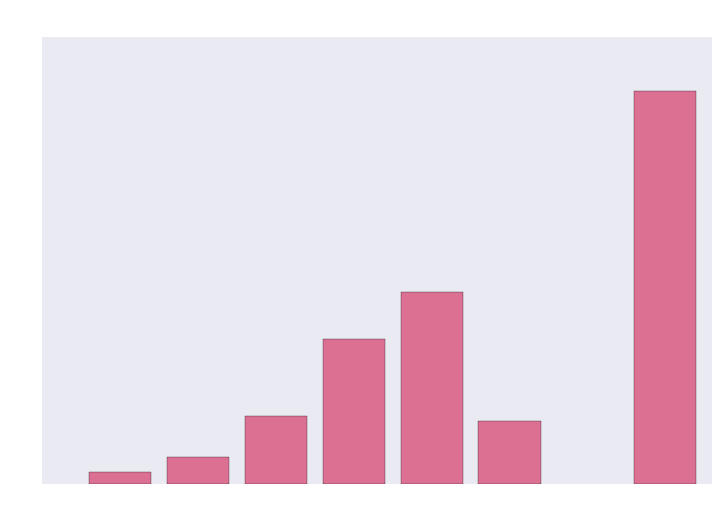

In [226]:
plt.subplots(figsize=(12,8))

plt.bar(global_sales.index, global_sales['Global_Sales'], color='palevioletred')
plt.xlabel('Amount of Platforms', fontsize=13, color='white')
plt.ylabel('Average Sales per Game in Millions', fontsize=13, color='white')
plt.yticks(color='white')
plt.xticks(np.linspace(0.4,8.4,9),range(9), color='white')
plt.title('Increase in Sales by Platforms', fontsize=16, y=1.03, color='white')
plt.grid()
plt.show()


In [56]:
company_game.groupby(['Name']).size()

Name
.hack//G.U. Vol.1//Rebirth                                                             1
.hack//G.U. Vol.2//Reminisce                                                           1
.hack//G.U. Vol.2//Reminisce (jp sales)                                                1
.hack//G.U. Vol.3//Redemption                                                          1
.hack//Link                                                                            1
.hack: Sekai no Mukou ni + Versus                                                      1
007: Quantum of Solace                                                                 4
1 vs. 100                                                                              1
1/2 Summer +                                                                           1
10 Minute Solution                                                                     1
100 All-Time Favorites                                                                 1
100 Classic Book

In [43]:
pd.pivot_table(company_game, values='Names', index='Names', aggfunc=np.count_nonzero)

KeyError: 'Names'

In [38]:
company_game

,Name,Year,Genre,Platform,Global_Sales
0,.hack//G.U. Vol.1//Rebirth,2006.0,Role-Playing,Sony,0.17
1,.hack//G.U. Vol.2//Reminisce,2006.0,Role-Playing,Sony,0.23
2,.hack//G.U. Vol.2//Reminisce (jp sales),2006.0,Role-Playing,Sony,0.16
3,.hack//G.U. Vol.3//Redemption,2007.0,Role-Playing,Sony,0.17
4,.hack//Link,2010.0,Role-Playing,Sony,0.14
5,.hack: Sekai no Mukou ni + Versus,2012.0,Action,Sony,0.03
6,007: Quantum of Solace,2008.0,Action,Microsoft,1.49
7,007: Quantum of Solace,2008.0,Action,Nintendo,0.81
8,007: Quantum of Solace,2008.0,Action,PC,0.03
9,007: Quantum of Solace,2008.0,Action,Sony,1.59


In [33]:
company

,Platform,Year,len,sum,avg
0,Microsoft,2005.0,190.0,57.49,0.30
1,Microsoft,2006.0,136.0,62.03,0.46
2,Microsoft,2007.0,124.0,96.39,0.78
3,Microsoft,2008.0,146.0,135.94,0.93
4,Microsoft,2009.0,173.0,120.85,0.70
5,Microsoft,2010.0,182.0,171.05,0.94
6,Microsoft,2011.0,206.0,145.12,0.70
7,Microsoft,2012.0,106.0,100.88,0.95
8,Microsoft,2013.0,82.0,108.21,1.32
9,Microsoft,2014.0,92.0,88.85,0.97


In [32]:
company_genre

,Platform,Year,Genre,len,sum
0,Microsoft,2005.0,Action,48.0,14.32
1,Microsoft,2005.0,Adventure,11.0,1.49
2,Microsoft,2005.0,Fighting,9.0,2.15
3,Microsoft,2005.0,Misc,13.0,1.47
4,Microsoft,2005.0,Platform,12.0,1.25
5,Microsoft,2005.0,Racing,19.0,6.99
6,Microsoft,2005.0,Role-Playing,5.0,1.44
7,Microsoft,2005.0,Shooter,40.0,16.87
8,Microsoft,2005.0,Simulation,5.0,0.91
9,Microsoft,2005.0,Sports,24.0,10.23


In [ ]:
company_game.groupby(['Platform','Year'])['Global_Sales'].agg({sum,len})